# Лабораторная работа №8

***Задание:*** Используя схемы *переменных направлений* и *дробных шагов*, решить двумерную начально-краевую задачу для дифференциального *уравнения параболического типа*. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $u(x, y, t)$. Исследовать зависимость погрешности от сеточных параметров $\tau$ и $h_x$, $h_y$.

#### Вариант №14

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

***Уравнение:***

$$\displaystyle\frac{\partial u}{\partial t} =  a\displaystyle\frac{\partial^2 u}{\partial x^2} + a\displaystyle\frac{\partial^2 u}{\partial y^2}, \; a >  0$$

\begin{equation*}
 \begin{cases}
   u (0, y, \: t) = \phi_0(y, t) = \cosh{y} \cdot e^{-3at}
   \\
   u (\frac{\pi}{4}, y, \: t) = \phi_1(y, t) = 0
   \\
   u (x, 0, \: t) = \psi_0(x, t) = \cos{2x} \cdot e^{-3at}
   \\
   u_{y}' (x, \ln{2}, \: t) = \psi_1(x, t) = \frac{3}{4} \cos{2x} \cdot e^{-3at}
   \\
   u(x, y, 0) = u_0 (x, y) = cos{2x} \cosh{y}
 \end{cases}
\end{equation*}

***Аналитическое решение:***
$$u(x, y, t) = e^{-3at} \cos{2x} \cosh{y}$$

Будем решать задачу на заданной площади  от $0$ до $l_x$ по координате $x$, от $0$ до $l_y$ по координате $y$ и на промежутке от $0$ до заданного параметра $T$ по времени $t$.

Рассмотрим конечно-разностную схему решения краевой задачи на сетке с граничными парамерами $l_x$, $l_y$, $T$ и параметрами насыщенности сетки $N_x$, $N_y$, $K$. Тогда размер шага по каждой из координат определяется:
$$h_x = \displaystyle\frac{l_x}{N_x -1}, \; h_y = \displaystyle\frac{l_y}{N_y -1} , \; \tau = \displaystyle\frac{T}{K-1}$$


Конечно-разностная схема решения параболического типа в сетке на временном слое $t^{k+1}$ определяется с помощью 2-ух этапов, на каждом из которых решается трёхдиагональное уравнение с помощью метода прогонки:
- Считая, что значения функции $u^k_{i, j} = u(x_i, y_j, t^k)$ на временном слое $t^{k}$ известно, попробуем определить значения функции на временном слое $t^{k + \frac{1}{2}}$ путем разностной апроксимации производной по времени:$\displaystyle\frac{\partial u}{\partial t}(x_i, y_j, t^k) = (1 + \gamma)\displaystyle\frac{u^{k+\frac{1}{2}}_{i, j} - u^{k}_{i, j}}{\tau}$, неявной аппроксимацией производной по $x$: $\displaystyle\frac{\partial^2 u}{\partial x^2}(x_i, y_j, t^k) = \displaystyle\frac{u^{k+\frac{1}{2}}_{i-1, j} - 2 u^{k + \frac{1}{2}}_{i, j} + u^{k+\frac{1}{2}}_{i+1, j}}{h_x^2}$ и явной аппроксимацией по $y$: $\displaystyle\frac{\partial^2 u}{\partial y^2}(x_i, y_j, t^k) = \displaystyle\frac{u^k_{i, j-1} - 2 u^k_{i, j} + u^k_{i, j+1}}{h_y^2}$ получаем уравнение:

<!-- $$(1 + \gamma)\displaystyle\frac{u^{k+\frac{1}{2}}_{i, j} - u^{k}_{i, j}}{\tau} = a\displaystyle\frac{u^{k+\frac{1}{2}}_{i-1, j} - 2 u^{k + \frac{1}{2}}_{i, j} + u^{k+\frac{1}{2}}_{i+1, j}}{h_x^2} +  a \gamma \displaystyle\frac{u^k_{i, j-1} - 2 u^k_{i, j} + u^k_{i, j+1}}{h_y^2}$$ -->

$$ -a \tau h_x^2 \gamma u^{k}_{i, j-1} - ((1 + \gamma) h_x^2 h_y^2 - 2 a \tau h_x^2 \gamma) u^{k}_{i, j} - a \tau h_x^2 \gamma u^{k}_{i, j+1} =  a \tau h_y^2 u^{k+\frac{1}{2}}_{i-1, j} - (2a \tau h_y^2 + (1 + \gamma) h_x^2 h_y^2) u^{k+\frac{1}{2}}_{i, j} + a \tau h_y^2 u^{k+\frac{1}{2}}_{i+1, j}$$


- Считая, что значения функции $u^{k+\frac{1}{2}}_{i, j} = u(x_i, y_j, t^{k+\frac{1}{2}})$ на временном слое $t^{k + \frac{1}{2}}$ известно из прошлого этапа, попробуем определить значения функции на временном слое $t^{k + 1}$ путем разностной апроксимации производной по времени:$\displaystyle\frac{\partial u}{\partial t}(x_i, y_j, t^{k+\frac{1}{2}}) = (1 + \gamma)\displaystyle\frac{u^{k+1}_{i, j} - u^{k+\frac{1}{2}}_{i, j}}{\tau}$, явной аппроксимацией производной по $x$: $\displaystyle\frac{\partial^2 u}{\partial x^2}(x_i, y_j, t^{k+\frac{1}{2}}) = \displaystyle\frac{u^{k+\frac{1}{2}}_{i-1, j} - 2 u^{k + \frac{1}{2}}_{i, j} + u^{k+\frac{1}{2}}_{i+1, j}}{h_x^2}$ и неявной аппроксимацией по $y$: $\displaystyle\frac{\partial^2 u}{\partial y^2}(x_i, y_j, t^{k+\frac{1}{2}}) = \displaystyle\frac{u^{k+1}_{i, j-1} - 2 u^{k+1}_{i, j} + u^{k+1}_{i, j+1}}{h_y^2}$ получим второе уравнение:

$$ -a \tau h_y^2 \gamma u^{k+\frac{1}{2}}_{i-1, j} - ((1 + \gamma) h_x^2 h_y^2 - 2 a \tau h_y^2 \gamma) u^{k + \frac{1}{2}}_{i, j} - a \tau h_y^2 \gamma u^{k+\frac{1}{2}}_{i+1, j} =  a \tau h_x^2 u^{k+1}_{i, j-1} - (2a \tau h_x^2 + (1 + \gamma) h_x^2 h_y^2) u^{k+1}_{i, j} + a \tau h_x^2 u^{k+1}_{i, j+1}$$

При $\gamma = 1$ получаем метод переменных направлений, когда как при $\gamma = 0$ - метод дробных шагов.

Значения на слое $u^0_{i,j}$ и на границах сетки определяются с помощью заданных граничных условий и их аппроксимаций.

Для того, чтобы получить 2-ой порядок аппроксимации будем аппроксимировать верхнюю границу по $y$ трёхточечной аппроксимацией в явном виде и двухточечной второго порядка в неявном методе.

#### Трёхточечная аппроксимация второго порядка

Трёхточечная апроксимация второго порядка в точке $y = l_y$ равна соответственно:

$$\displaystyle\frac{3u^{k+\frac{1}{2}}_{i, N_y} - 4u^{k+\frac{1}{2}}_{i, N_y -1} + u^{k+\frac{1}{2}}_{i, N_y -2}}{2h_y} = \psi_1(x_i, t^{k+\frac{1}{2}})$$

Тогда, поскольку мы знаем значения для внутренних узлов, получаем выражение для граничного значения при явном методе:

$$u^{k+\frac{1}{2}}_{i, N_y} = \displaystyle\frac{2 h_y \psi_1(x_i, t^{k+\frac{1}{2}}) + 4u^{k+\frac{1}{2}}_{i, N_y -1} - u^{k+\frac{1}{2}}_{i, N_y -2}}{3}$$

#### Двухточечная аппроксимация второго порядка

Двухточечная апроксимация второго порядка в точке $y = l_y$ равна соответственно:

$$\displaystyle\frac{u^{k+1}_{i, N_y +1} - u^{k+1}_{i, N_y -1}}{2h_y} = \psi_1(x_i, t^{k+1})$$

Тогда, поскольку мы знаем значения для внутренних узлов, получаем выражение для граничного значения при неявном методе:

$$ -a \tau h_y^2 \gamma u^{k+\frac{1}{2}}_{i-1, N_y} - ((1 + \gamma) h_x^2 h_y^2 - 2 a \tau h_y^2 \gamma) u^{k + \frac{1}{2}}_{i, N_y} - a \tau h_y^2 \gamma u^{k+\frac{1}{2}}_{i+1, N_y} - 2 a \tau h_x^2 h_y \psi_1(x_i, t^{k+1})  =  2 a \tau h_x^2 u^{k+1}_{i, N_y -1} - (2a \tau h_x^2 + (1 + \gamma) h_x^2 h_y^2) u^{k+1}_{i, N_y}$$

#### Двухточечная аппроксимация первого порядка

Впрочем можно аппроксировать граничное условие в обоих случаях двухточечной аппроксимацией первого порядка:

$$\displaystyle\frac{u^{k+1}_{i, N_y} - u^{k+1}_{i, N_y -1}}{h_y} = \psi_1(x_i, t^{k+1})$$

Тогда очевидны формулы для определения значений функции при $y = l_y$ в обоих направлениях прогонки.

In [ ]:
# analytic solve
def u(x, y, t, a = 1):
    return math.cos(2*x) * math.cosh(y) * math.exp(-3*a*t)

In [ ]:
# class will return grid of values
class Schema:
    def __init__(self, a = 1, T = 5, order2nd = True):

        self.a = a

        self.psi0 = lambda x,t,a: math.cos(2*x) * math.exp(-3*a*t)
        self.psi1 = lambda x,t,a: 3*math.cos(2*x)*math.exp(-3*a*t) / 4
        self.phi0 = lambda y,t,a: math.cosh(y) * math.exp(-3*a*t)
        self.phi1 = lambda x,y,a: 0

        self.rho0 = lambda x,y,a: math.cos(2*x) * math.cosh(y)
        self.T = T

        self.lx0, self.lx1 = 0, math.pi/4
        self.ly0, self.ly1 = 0, math.log(2)

        self.tau = None
        self.hx = None
        self.hy = None
        self.order = order2nd

        self.Nx = None
        self.Ny = None
        self.K = None
        self.cx = None
        self.bx = None
        self.cy = None
        self.by = None
        self.hx2 = None
        self.hy2 = None


    def set_l0_l1(self, lx0, lx1, ly0, ly1):
        self.lx0, self.lx1 = lx0, lx1
        self.ly0, self.ly1 = ly0, ly1

    def set_T(self, T):
        self.T = T

    def compute_h(self):
        self.hx, self.hy = (self.lx1 - self.lx0) / (self.Nx - 1), (self.ly1 - self.ly0) / (self.Ny - 1)
        self.hx2, self.hy2 = self.hx**2, self.hy**2

    def compute_tau(self):
        self.tau = self.T / (self.K - 1)

    @staticmethod
    def race_method(A, b):
        P = [-item[2] for item in A]
        Q = [item for item in b]

        P[0] /= A[0][1]
        Q[0] /= A[0][1]

        for i in range(1, len(b)):
            z = (A[i][1] + A[i][0] * P[i-1])
            P[i] /= z
            Q[i] -= A[i][0] * Q[i-1]
            Q[i] /= z

        for i in range(len(Q) - 2, -1, -1):
            Q[i] += P[i] * Q[i + 1]

        return Q

    @staticmethod
    def nparange(start, end, step = 1):
        now = start
        e = 10**-10
        while now - e <= end:
            yield now
            now += step

    def compute_left_edge(self, X, Y, t, square):
        for i in range(self.Ny):
            square[i][0] = self.phi0(Y[i][0], t, self.a)

    def compute_right_edge(self, X, Y, t, square):
        for i in range(self.Ny):
            square[i][-1] = self.phi1(Y[i][-1], t, self.a)

    def compute_bottom_edge(self, X, Y, t, square):
        for j in range(1, self.Nx - 1):
            square[0][j] = self.psi0(X[0][j], t, self.a)


    def compute_line_first_step(self, i, X, Y, last_square, now_square):
        hy2 = self.hy2
        hx2 = self.hx2

        b = self.bx
        c = self.cx

        # first coeffs
        A = [(0, b, c)]
        w = [
            -self.cy*self.order*last_square[i-1][1] -
            ((self.order + 1)*hx2*hy2 - 2*self.cy*self.order)*last_square[i][1] -
            self.cy*self.order*last_square[i+1][1] - c*now_square[i][0]
        ]
        # inner coefs
        A.extend([(c, b, c) for _ in range(2, self.Nx - 2)])
        w.extend([
            -self.cy*self.order*last_square[i-1][j] -
            ((self.order + 1)*hx2*hy2 - 2*self.cy*self.order)*last_square[i][j] -
            self.cy*self.order*last_square[i+1][j]
            for j in range(2, self.Nx - 2)
        ])

        # last coeffs
        A.append((c, b, 0))
        w.append(
            -self.cy*self.order*last_square[i-1][-2] -
            ((self.order + 1)*hx2*hy2 - 2*self.cy*self.order)*last_square[i][-2] -
            self.cy*self.order*last_square[i+1][-2] - c*now_square[i][-1]
        )

        line = self.race_method(A, w)

        for j in range(1, self.Nx - 1):
            now_square[i][j] = line[j - 1]


    # compute second step
    def compute_line_second_step(self, j, X, Y, t, last_square, now_square):
        hx2 = self.hx2
        hy2 = self.hy2

        c = self.cy
        b = self.by

        # first coeffs
        A = [(0, b, c)]
        w = [
            -self.cx*self.order*last_square[1][j - 1] -
            ((self.order + 1)*hx2*hy2 - 2*self.cx*self.order)*last_square[1][j] -
            self.cx*self.order*last_square[1][j + 1] - c*now_square[0][j]
        ]

        # inner coefs
        A.extend([(c, b, c) for _ in range(2, self.Ny - 1)])
        w.extend([
            -self.cx*self.order*last_square[i][j - 1] -
            ((self.order + 1)*hx2*hy2 - 2*self.cx*self.order)*last_square[i][j] -
            self.cx*self.order*last_square[i][j + 1]
            for i in range(2, self.Ny - 1)
        ])

        # last coeffs
        koeffs = self.implict_top_approx(j, X, Y, t, now_square, last_square)
        A.append(koeffs[:-1])
        w.append(koeffs[-1])

        line = self.race_method(A, w)

        for i in range(1, self.Ny):
            now_square[i][j] = line[i - 1]


    # explict approx
    def explict_top_approx(self, X, Y, t, square):
        for j in range(1, self.Nx - 1):
            square[-1][j] = 2*self.hy*self.psi1(X[-1][j], t, self.a)
            square[-1][j] += 4*square[-2][j] - square[-3][j]
            square[-1][j] /= 3

    # implict approx
    def implict_top_approx(self, j, X, Y, t, square, last_square):
        hx2 = self.hx2
        hy2 = self.hy2

        c = 2 * self.a * self.tau * hx2
        b = -(c + (1 + self.order)*hx2*hy2)

        w = -self.cx*self.order*last_square[-1][j - 1]
        w -= ((self.order + 1)*hx2*hy2 - 2*self.cx*self.order)*last_square[-1][j]
        w -= self.cx*self.order*last_square[-1][j + 1]
        w -= c*self.hy*self.psi1(X[-1][j], t, self.a)

        return (c, b, 0, w)


    def explict_top_approx_0(self, X, Y, t, square):
        for j in range(1, self.Nx - 1):
            square[-1][j] = self.hy*self.psi1(X[-1][j], t, self.a)
            square[-1][j] += square[-2][j]

    def implict_top_approx_0(self, j, X, Y, t, square, last_square):
        return (-1, 1, 0, self.hy*self.psi1(X[-1][j], t, self.a))

    def compute_square(self, X, Y, t, last_square):
        # init square space for (k + 1/2) values
        square = [[0.0 for _ in range(self.Nx)] for _ in range(self.Ny)]
        self.compute_left_edge(X, Y, t - 0.5*self.tau, square) # use time between
        self.compute_right_edge(X, Y, t - 0.5*self.tau, square)
        self.compute_bottom_edge(X, Y, t - 0.5*self.tau, square)

        # compute first step inner values
        for i in range(1, self.Ny - 1):
            self.compute_line_first_step(i, X, Y, last_square, square)
        # compute first step last values by approx:
        self.explict_top_approx(X, Y, t - 0.5*self.tau, square)

        #update last and new squares
        last_square = square
        square = [[0.0 for _ in range(self.Nx)] for _ in range(self.Ny)]
        self.compute_left_edge(X, Y, t, square)
        self.compute_right_edge(X, Y, t, square)
        self.compute_bottom_edge(X, Y, t, square)

        # compute inner and top values of step 2
        for j in range(1, self.Nx - 1):
            self.compute_line_second_step(j, X, Y, t, last_square, square)

        return square


    def init_t0(self, X, Y):
        # init mem =)
        first = [[0.0 for _ in range(self.Nx)] for _ in range(self.Ny)]
        for i in range(self.Ny):
            for j in range(self.Nx):
                first[i][j] = self.rho0(X[i][j], Y[i][j], self.a)
        return first

    def __call__(self, Nx=20, Ny=20, K=20):
        # compute t and hx, hy
        self.Nx, self.Ny, self.K = Nx, Ny, K
        self.compute_tau()
        self.compute_h()

        self.bx = -2*self.a*self.tau*self.hy2
        self.bx -= (1 + self.order)*self.hx2*self.hy2
        self.cx = self.a * self.tau * self.hy2

        self.cy = self.a * self.tau * self.hx2
        self.by = -2*self.a*self.tau*self.hx2
        self.by -= (1 + self.order)*self.hx2*self.hy2

        # compute x, y values:
        x = list(self.nparange(self.lx0, self.lx1, self.hx))
        y = list(self.nparange(self.ly0, self.ly1, self.hy))
        # grid of (x, y)
        X = [x for _ in range(self.Ny)]
        Y = [[y[i] for _ in x] for i in range(self.Ny)]

        taus = [0.0]

        # get first values of grid on t = 0
        ans = [self.init_t0(X, Y)]

        # compute grid
        for t in self.nparange(self.tau, self.T, self.tau):
            # append new square
            ans.append(self.compute_square(X, Y, t, ans[-1]))
            taus.append(t)

        return X, Y, taus, ans

#### Реальное значение функции

In [ ]:
def real_z_by_time(lx0, lx1, ly0, ly1, t, f):
    x = np.arange(lx0, lx1 + 0.002, 0.002)
    y = np.arange(ly0, ly1 + 0.002, 0.002)
    X = np.ones((y.shape[0], x.shape[0]))
    Y = np.ones((x.shape[0], y.shape[0]))
    Z = np.ones((y.shape[0], x.shape[0]))
    for i in range(Y.shape[0]):
        Y[i] = y
    Y = Y.T
    for i in range(X.shape[0]):
        X[i] = x
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j], t)
    return X, Y, Z

#### Вычисление погрешностей

In [ ]:
def epsilon(X, Y, t, z, ut = u, a = 1):
    ans = 0.0
    for i in range(len(z)):
        for j in  range(len(z[i])):
            ans += (ut(X[i][j], Y[i][j], t, a) - z[i][j])**2
    return (ans / len(z) / len(z[0]))**0.5

#### Визуализация

In [ ]:
def step_slice(lst, step):
    return lst[step]

def animate_list(lst, play=False, interval=200):
    slider = widgets.IntSlider(min=0, max=len(lst) - 1, step=1, value=0)
    if play:
        play_widjet = widgets.Play(interval=interval)
        widgets.jslink((play_widjet, 'value'), (slider, 'value'))
        display(play_widjet)
    return interact(step_slice,
                    lst=fixed(lst),
                    step=slider)

In [ ]:
def plot_by_time(X, Y, T, Z, j, a, extrems, plot_true = True):
    t = T[j]
    z = Z[j]
    fig = plt.figure(num=1, figsize=(20, 13), clear=True)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(np.array(X), np.array(Y), np.array(z))
    if plot_true:
        ax.plot_wireframe(*real_z_by_time(0, math.pi/4, 0, math.log(2), t, u), color="green")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(
        't = ' + str(round(t, 8)) + " RMSE = " + str(round(epsilon(X, Y, t, z, a = a), 11)),
        loc = "right", fontsize=25
    )
    ax.set_zlim(extrems[0], extrems[1])
    fig.tight_layout()
    plt.close(fig)
    return fig

def search_minmax(zz):
    z = zz[0]
    minimum, maximum = z[0][0], z[0][0]
    for i in range(len(z)):
        for j in range(len(z[i])):
            minimum = z[i][j] if z[i][j] < minimum else minimum
            maximum = z[i][j] if z[i][j] > maximum else maximum
    return minimum, maximum

def plot_animate(nx = 15, ny = 15, k=50, t=1, a = 1, plot_true = False):
    schema = Schema(T = t, a = a, order2nd = False)
    xx, yy, tt, zz = schema(Nx = nx, Ny = ny, K = k)
    extrems = search_minmax(zz)
    plots = []
    for j in range(len(tt)):
        plots.append(plot_by_time(xx, yy, tt, zz, j, a, extrems, plot_true))
    animate_list(plots, play=True, interval=2000)

Тогда в зависмоси от параметров полученное приближение будет иметь следующий вид:

In [ ]:
interact(
    plot_animate,
    nx=(5, 200, 2),
    ny=(5, 200, 2),
    k=(20, 200, 5),
    t = (1, 10, 1),
    a = (1.0, 5.0, 0.1),
    plot_true = [False, True]
)

None

interactive(children=(IntSlider(value=15, description='nx', max=200, min=5, step=2), IntSlider(value=15, descr…

<h3><center> Зависимость погрешности расчетов от параметров </center></h3>

In [ ]:
first = Schema(T = 1, order2nd = False) #метод дробных шагов
second = Schema(T = 1, order2nd = True) #метод переменных направлений

#### Постоение зависимости погрешности от шага $h_x, \; h_y$.

In [ ]:
def get_graphic_h(solver, time = 0, tsteps = 400):
    h = []
    e = []
    for N in range(4, 35, 1):
        x, y, t, z = solver(Nx = N, Ny = N, K = tsteps)
        h.append(solver.hx)
        e.append(epsilon(x, y, t[time], z[time]))
    return h, e

Зависимoсть погрешности от длины шагов по координате при фиксированном шаге по времени в методе дробных шагов и переменных направлений:

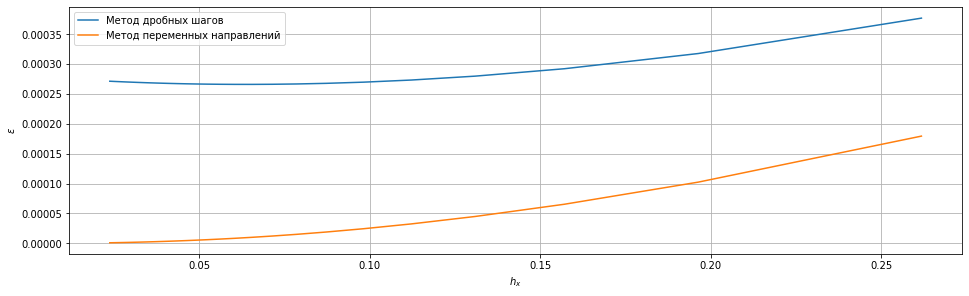

In [ ]:
TSTEPS = 300
time = random.randint(0, TSTEPS - 1)

plt.figure(figsize = (16, 10))

plt.title("Зависимость погрешности от длины шага при t = " + str(time / TSTEPS))

plt.subplot(2, 1, 1)

h1, e1 = get_graphic_h(first, time, TSTEPS)
h2, e2 = get_graphic_h(second, time, TSTEPS)

plt.plot(h1, e1, label="Метод дробных шагов")
plt.plot(h2, e2, label="Метод переменных направлений")

plt.xlabel("$h_x$")
plt.ylabel("$\epsilon$")
plt.legend()
plt.grid()

#### Построение зависимости погрешности от $\tau$

Сетки значений погрешности и соответствующих длин шагов получим с помощью функции:

In [ ]:
def get_graphic_tau(solver):
    tau = []
    e = []
    for K in range(15, 100, 2):
        x, y, t, z = solver(Nx = 10, Ny = 10, K = K)
        tau.append(solver.tau)
        time = K // 2
        e.append(epsilon(x, y, t[time], z[time]))
    return tau, e

Зависимсоть погрешности от длины шага по времени при фиксированных шагах по координатам в методе дробных шагов и переменных направлений:

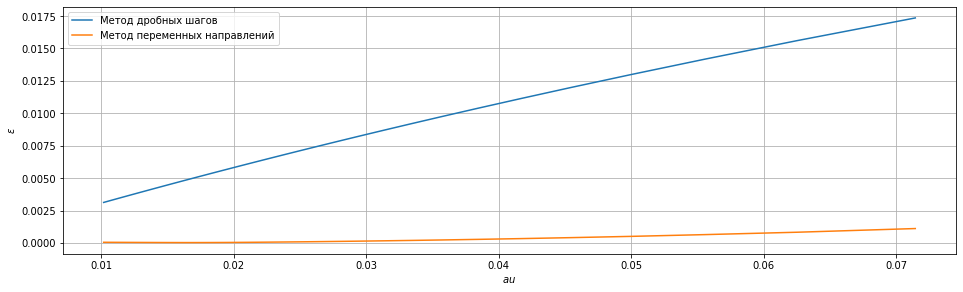

In [ ]:
plt.figure(figsize = (16, 10))
plt.title("Зависимость погрешности от длины шага по времени")
plt.subplot(2, 1, 1)

tau1, e1 = get_graphic_tau(first)
tau2, e2 = get_graphic_tau(second)

plt.plot(tau1, e1, label="Метод дробных шагов")
plt.plot(tau2, e2, label="Метод переменных направлений")
plt.xlabel("$\tau$")
plt.ylabel("$\epsilon$")
plt.legend()
plt.grid()

#### Общая зависимость погрешости от сеточных параметров

$RMSE$ по всей кубической сетке:

In [ ]:
def full_epsilon(X, Y, T, Z):
    ans = 0.0
    for k in range(len(T)):
        for i in range(len(X)):
            for j in  range(len(X[i])):
                ans += (u(X[i][j], Y[i][j], T[k]) - Z[k][i][j])**2
    return (ans / len(T) / len(X) / len(X[0]))**0.5

График зависимсоти погрешности от параметров шага  по координате и времени:

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.63it/s]


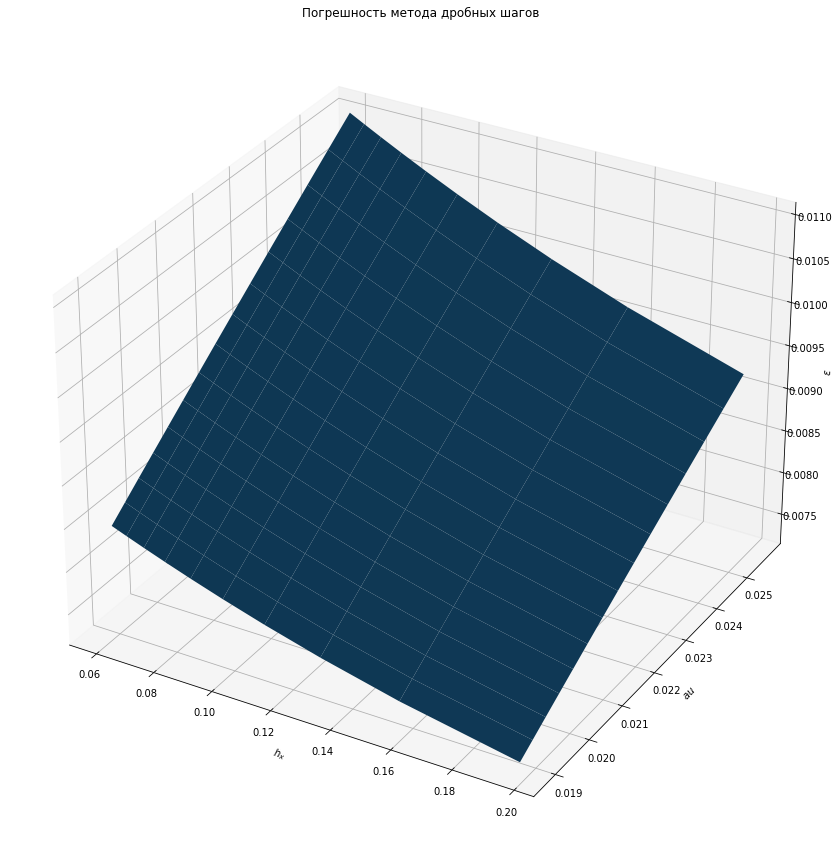

In [ ]:
def plot_epsilon():
    schema = Schema(T = 1, order2nd=False)
    h = []
    tau = []
    eps = []
    for i in tqdm(range(10)):
        h.append([])
        tau.append([])
        eps.append([])
        for j in range(15):
            N = i + 5
            K = j + 40
            X, Y, T, Z = schema(N, N, K)
            h[-1].append(schema.hx)
            tau[-1].append(schema.tau)
            eps[-1].append(full_epsilon(X, Y, T, Z))

    fig = plt.figure(num=1, figsize=(19, 12), clear=True)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(np.array(h), np.array(tau), np.array(eps))
    ax.set(xlabel='$h_x$', ylabel='$\tau$', zlabel='$\epsilon$', title='Погрешность метода дробных шагов')
    fig.tight_layout()

plot_epsilon()